# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Akhmad Fadilla Akbar
- **Email:** androred25@gmail.com
- **ID Dicoding:** akhbarr

## Menentukan Pertanyaan Bisnis

- Berapa penyewaan rata-rata sepeda terjadi per harinya?
- Pada musim apa penyewaan sepeda paling banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Wrangling

### 1. Gathering Data

Memuat dan menyimpan data pada setiap dataframe

In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2. Assessing Data

Menampilkan tipe data setiap dataframe

In [ ]:
day_df.info()
print("\n\n")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (

Memeriksa missing Value dan duplikasi data pada semua dataframe

In [ ]:
print("Jumlah Duplikasi Data: ", day_df.duplicated().sum())
day_df.isna().sum()

Jumlah Duplikasi Data:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah Duplikasi Data: ", hour_df.duplicated().sum())
hour_df.isna().sum()

Jumlah Duplikasi Data:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 3. Cleaning Data

Mengubah tipe data menjadi datetime pada dteday

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df["dteday"]= pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Rent by season

In [ ]:
day = day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})
print("Demograsi Tabel  Day :", day)


hour = hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})
print('Demografi Tabel Hour :', hour)

Demograsi Tabel  Day :        instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261
Demografi Tabel Hour :        instant  cnt                            
       nunique  max min        mean         std
season                                         
1         4242  801   1  111.114569  119.224010
2         4409  957   1  208.344069  188.362473
3         4496  977   1  236.016237  197.711630
4         4232  967   1  198.868856  182.967972


Dari data tersebut, kita dapat melihat bahwa rata-rata penggunaan sepeda cenderung lebih tinggi pada musim-musim tertentu, seperti musim 3 dan 4, dibandingkan dengan musim lainnya. Hal ini bisa menjadi indikasi bahwa penggunaan sepeda lebih populer pada musim-musim tersebut.

### Explore Rent by weather

In [ ]:
day = day_df.groupby(by='weathersit').agg({
    "instant":'nunique',
    'cnt': ['max', 'min', 'mean', 'std']
})
print('Demografi penyewa sepeda per hari:',day)


hour = hour_df.groupby(by='weathersit').agg({
    "instant":'nunique',
    'cnt': ['max', 'min', 'mean', 'std']
})
print('Demografi penyewa sepeda per jam :',hour)

Demografi penyewa sepeda per hari:            instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449
Demografi penyewa sepeda per jam :            instant  cnt                            
           nunique  max min        mean         std
weathersit                                         
1            11413  977   1  204.869272  189.487773
2             4544  957   1  175.165493  165.431589
3             1419  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178


Melihat penyebaran data kedua dataframe

In [ ]:
print('Data day_df')
print('pivot tabel data day :', day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data day :', day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data day :', day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data day :', day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False))

Data day_df
pivot tabel data day : holiday
0    679
1     20
Name: cnt, dtype: int64
pivot tabel data day : weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64
pivot tabel data day : workingday
1    487
0    223
Name: cnt, dtype: int64
pivot tabel data day : yr
1    356
0    352
Name: cnt, dtype: int64


In [ ]:
print('Data hour_df')
print('pivot tabel data hour :', hour_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data hour :', hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data hour :', hour_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data hour :', hour_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False))

Data hour_df
pivot tabel data hour : holiday
0    869
1    276
Name: cnt, dtype: int64
pivot tabel data hour : weekday
3    616
6    609
4    606
2    598
1    595
5    584
0    571
Name: cnt, dtype: int64
pivot tabel data hour : workingday
1    856
0    676
Name: cnt, dtype: int64
pivot tabel data hour : yr
1    866
0    585
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa penyewaan rata-rata sepeda terjadi per harinya?



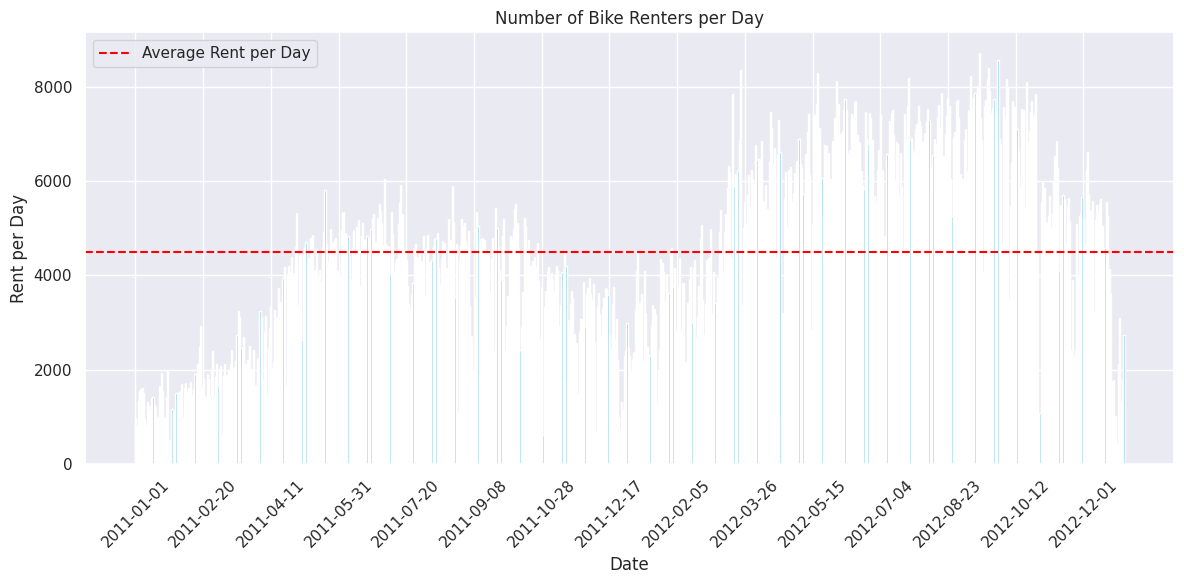

In [ ]:
#Membuat rata-rata penyewa
average_rent_per_day = day_df['cnt'].mean()

plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
plt.bar(day_df['dteday'], day_df['cnt'], color='skyblue')
plt.axhline(average_rent_per_day, color='red', linestyle='--', label='Average Rent per Day')  # Menambahkan garis rata-rata
plt.title('Number of Bike Renters per Day')
plt.xlabel('Date')
plt.ylabel('Rent per Day')
plt.xticks(day_df['dteday'][::50], rotation=45)  # Memilih setiap 50 tanggal untuk label sumbu x
plt.legend()  # Menampilkan legenda
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

<Axes: >

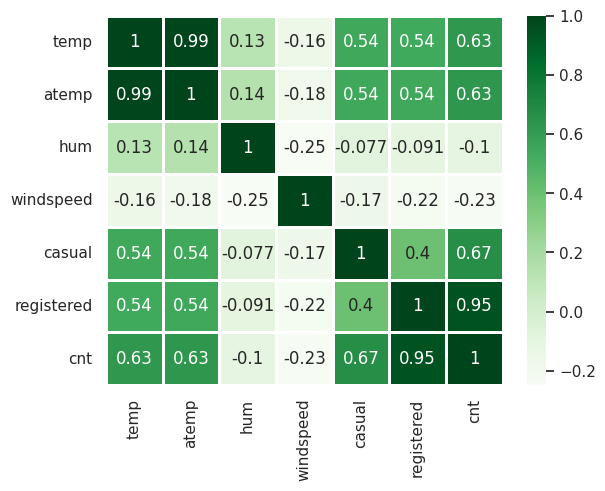

In [ ]:
day_new = day_df[['temp','atemp','hum','windspeed','casual', 'registered','cnt']]
sns.heatmap(day_new.corr(), annot=True, cmap='Greens', linewidths=1)

Korelasi antara dua parameter mendekati 1: korelasi positif kuat.
Korelasi antara dua parameter mendekati 0: tidak ada korelasi.
Korelasi antara dua parameter mendekati -1: korelasi negatif kuat.

<ipython-input-45-4e1497d56fa0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='season',y='cnt', data=day_df,palette='Paired')


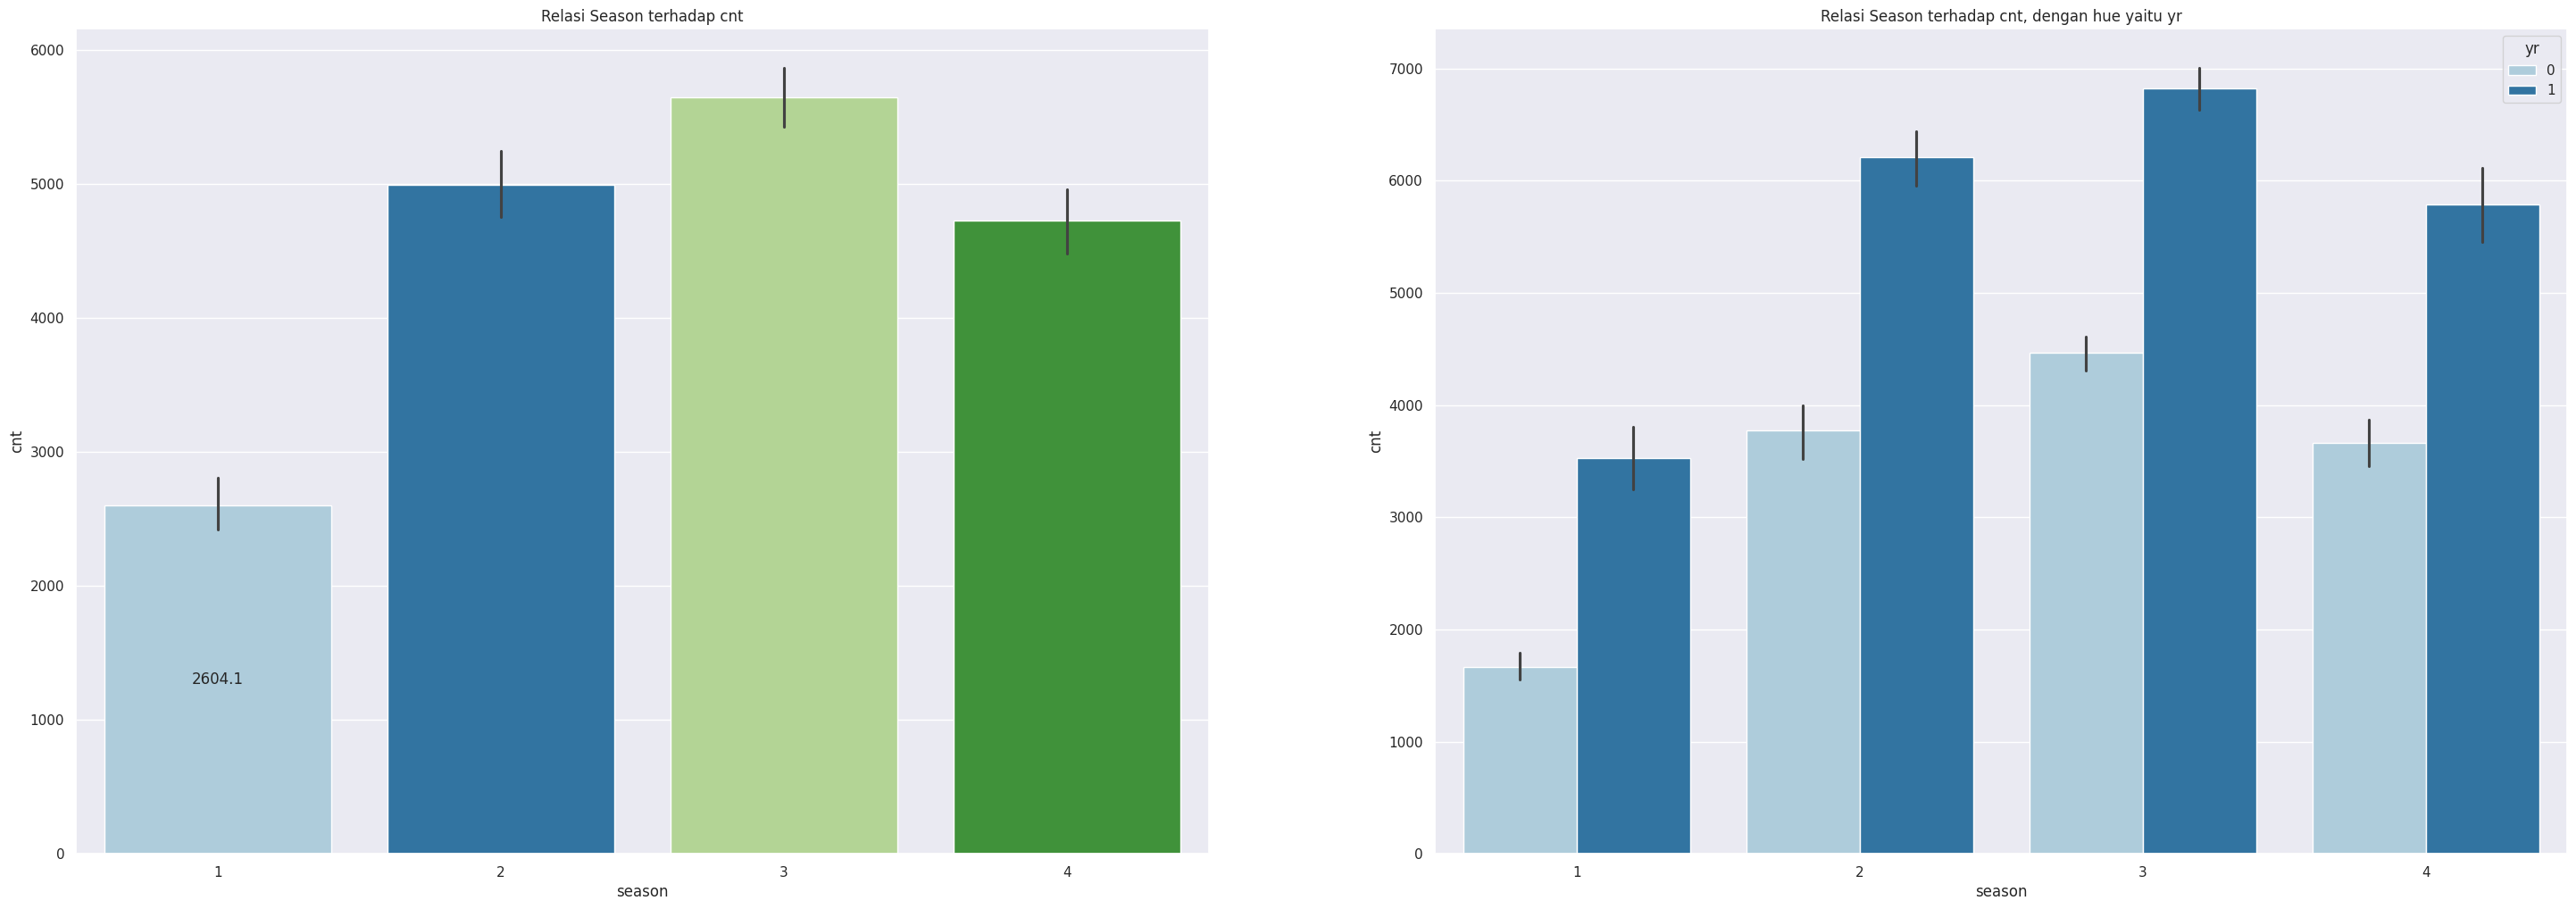

In [ ]:
plt.figure(figsize=(36,12))
plt.subplot(1,2,1)
ax = sns.barplot(x='season',y='cnt', data=day_df,palette='Paired')
plt.title("Relasi Season terhadap cnt")
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(1,2,2)
plt.title("Relasi Season terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='season',y='cnt', hue='yr', data=day_df,palette='Paired')

Lebih dari 32% dari total pemesanan sepeda terjadi selama musim gugur (season 3), dengan rata-rata 5.644,3 pemesanan selama dua tahun. Musim panas (season 2) dan musim dingin (season 4) mengikuti dengan masing-masing 27% dan 25% dari total pemesanan. Data ini menunjukkan bahwa musim dapat menjadi faktor penting dalam memprediksi jumlah penyewa sepeda di masa depan.

### Pertanyaan 2: Pada musim apa penyewaan sepeda paling banyak terjadi?

<ipython-input-47-014b9710869d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


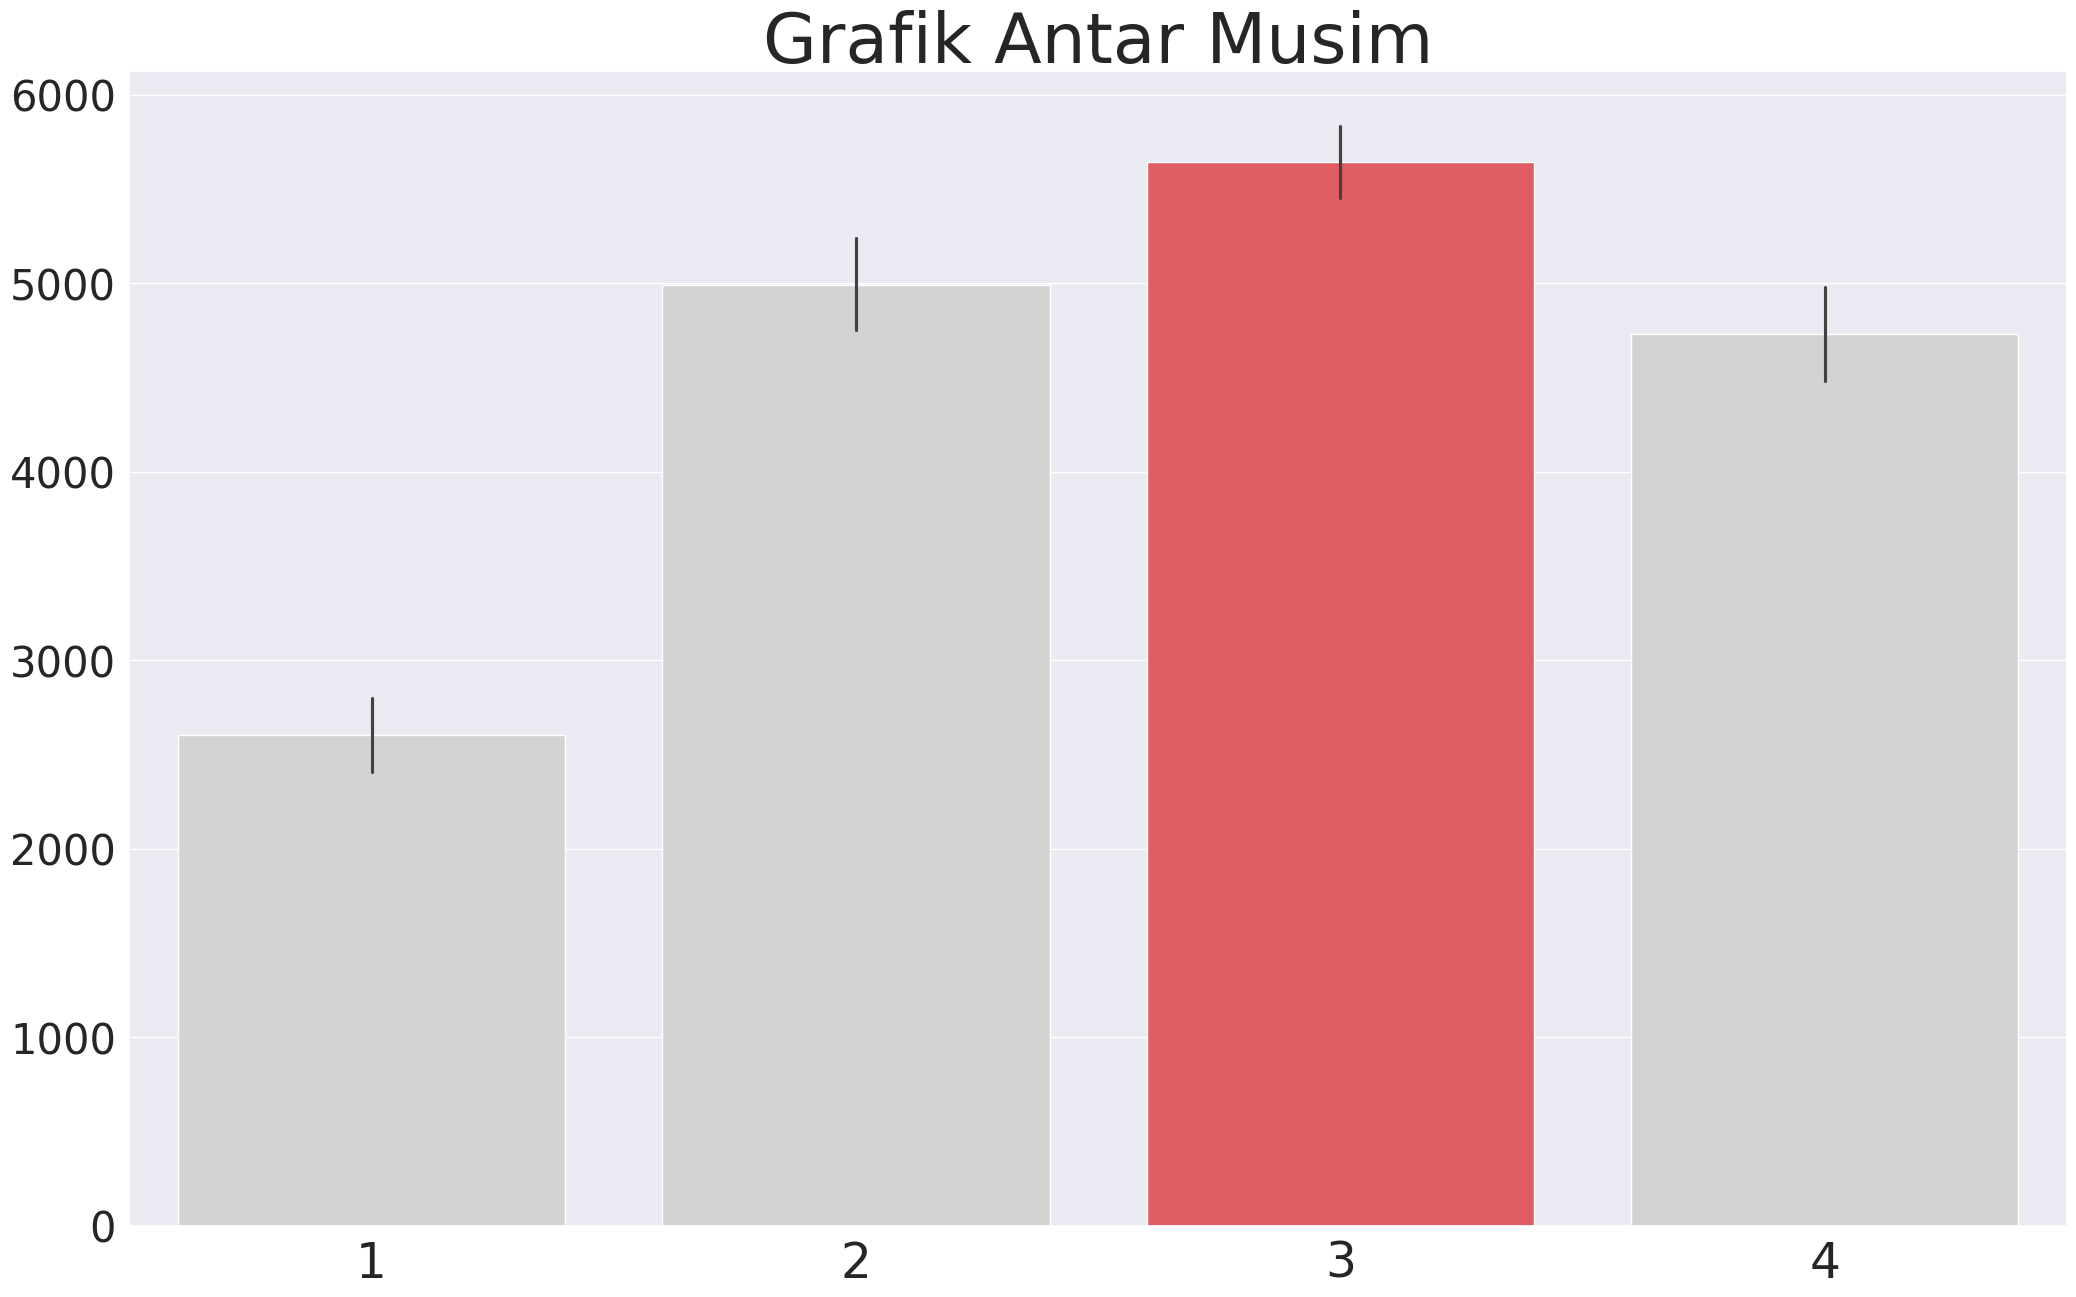

In [ ]:
colors = ["#D3D3D3", "#D3D3D3", "#f54750", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (25, 15)
fig, ax = plt.subplots(figsize=(25, 15))

sns.barplot(
        y="cnt",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

plt.show()

## Conclusion

- Conclution pertanyaan 1: Rata-rata penyewaan terjadi setiap harinya diangka 4000 - 5000 penyewa.
- Conclution pertanyaan 2: Penyewaan yang paling banyak terjadi dengan parameter musim yaitu pada musim Gugur atau musim 3